# Exploration du jeu de données

La base de données sur laquelle nous allons travailler est la base [MNIST](http://yann.lecun.com/exdb/mnist/) qui regroupe un grand nombre de chiffres écrits à la main et leur label correspondant. Voyons à quoi elle ressemble.

Tensorflow propose directement de télécharger ces données via son API sous la forme d'un jeu de données d'entrainement et un jeu de données de test

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from random import randint
from IPython.core.display import HTML
from intro_function import *

In [2]:
tf.__version__

'2.9.1'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(trImages, trLabels), (tImages, tLabels) = (x_train, y_train), (x_test, y_test)

In [4]:
print("--------------------------")
print("Dimensions of Train Set")
print("Dimension(trImages)=",np.shape(trImages))
print("There are", np.shape(trImages)[0], "images where each image is", np.shape(trImages)[1:], "in size")
print("There are", np.shape(np.unique(tLabels))[0], "unique image labels")
print("--------------------------")
print("Dimensions of Test Set")
print("Dimension(tImages)=",np.shape(tImages), "Dimension(tLabels)=", np.shape(tLabels)[0])
print("--------------------------")

--------------------------
Dimensions of Train Set
Dimension(trImages)= (60000, 28, 28)
There are 60000 images where each image is (28, 28) in size
There are 10 unique image labels
--------------------------
Dimensions of Test Set
Dimension(tImages)= (10000, 28, 28) Dimension(tLabels)= 10000
--------------------------


## Structure des données

Les variables x et y sont des tableaux de type numpy.ndarray de 60K lignes pour les données d'entrainement et de 10 000 pour les données de test.

Afficher les différentes structures de données, et au moins une des valeurs pour chaque type.

## Visualisation des données

In [5]:
import matplotlib.pyplot as plt
import random

In [6]:
type(x_train)

numpy.ndarray

* L1 : distance euclydienne à utiliser dans un premier temps.
* L2 : distance manathan

Text(0.5, 1.0, '5')

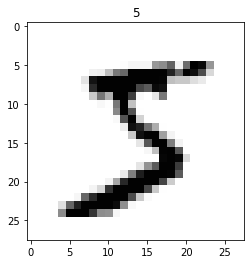

In [7]:
plt.imshow(x_train[0], cmap='Greys')
plt.title(f"{y_train[0]}")

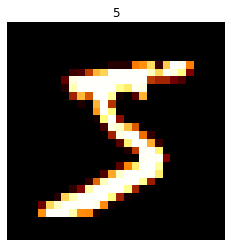

In [8]:
show_digit(x_train[0], y_train[0])

Visualisation d'une image au hasard dans l'ensemble d'entrainement et donner son étiquette associée:

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train[0]

5

In [11]:
x_train.shape

(60000, 28, 28)

Visualisation d'une image au hasard dans l'ensemble de test et donner son étiquette associée:

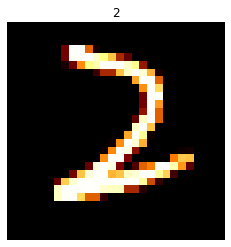

In [12]:
img_id = randint(0, x_train.shape[0])
show_digit(x_train[img_id], y_train[img_id])

## Manipulation des images

Créer un pourtour noir d'un pixel autour d'une image choisie et l'afficher.

In [13]:
from PIL import Image, ImageDraw

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
img= Image.fromarray(x_train[img_id])
# print(from PIL import Image, ImageDraw.s)
img

In [16]:
img2=img.copy()

for i in range (0,28):
    img2.putpixel((0,i),255)
    img2.putpixel((i,27),255)
    img2.putpixel((i,0),255)
    img2.putpixel((27,i),255)

img2

## Utilisation des algorithmes connus

Entre kNN et kmeans, quel serait l'algorithme le plus adéquat pour déterminer le type d'une image de l'ensemble de test. En essayer une implémentation, et donner la précision que cela vous donne.

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

In [18]:
random_state=0
verbose=0

In [19]:
nb_target = 10

In [20]:
def get_model_list(random_state=0, n_neighbors=3, verbose=0):
    model_list = {"KNN":KNeighborsClassifier(n_neighbors=n_neighbors),
                #   "KNN_grid":classifier_knn_grid(X_train=None, y_train=None,verbose=verbose),
                  }
    return model_list

### KNN

https://colab.research.google.com/github/FreeOfConfines/ExampleNNWithKerasAndTensorflow/blob/master/K_Nearest_Neighbor_Classification_with_Tensorflow_on_Fashion_MNIST_Dataset.ipynb#scrollTo=hvjiPiUazcV1

In [21]:
model_list = get_model_list(verbose=verbose)

In [22]:
x_train_2d = x_train.reshape(x_train.shape[0], -1)
print(x_train_2d.shape)
x_test_2d = x_test.reshape(x_test.shape[0], -1)
print(x_test_2d.shape)

(60000, 784)
(10000, 784)


In [23]:
modeldic, scores = fit_and_test_models(model_list, x_train_2d, y_train, x_test_2d, y_test, verbose=verbose, metrics=2)
score_df = pd.DataFrame(scores).set_index("Modeli")
display(HTML(score_df.to_html()))

,Class,Model,R2,fit time,fit seconde,metrics time,metrics seconde,predict time,predict seconde,MAE,MSE,RMSE,Mediane AE,Brier loss,Log loss,F1 micro,F1 macro,F1 weighted,Recall micro,Recall macro,Recall weighted,Roc auc ovo,Roc auc ovr
Modeli,,,,,,,,,,,,,,,,,,,,,,,
KNN,,KNN,0.9705,00:00:13,13.504033,00:00:26,26.019336,00:00:13,13.644835,4.821,0.5792,0.761052,0.0,NaN,NaN,0.9705,0.970375,0.970452,0.9705,0.970114,0.9705,NaN,NaN


In [24]:
modeldic.get("KNN")

KNeighborsClassifier(n_neighbors=3)

### KMeans

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
init = np.array([x_train_2d[y_train==i][0] for i in range(0, 10)],np.float64)
init[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [29]:
clusterer = KMeans(n_clusters=10, random_state=random_state, init=init, n_init=10)
cluster_labels = clusterer.fit_predict(x_train_2d, y_train)
clusterer.score(x_test_2d, y_test)

c:\Program Files\Python_venv\tensor_flow\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


-25555391792.64901

In [30]:
cluster_labels

array([3, 0, 4, ..., 3, 8, 7])

In [31]:
df = pd.DataFrame({'expected':y_train, 'KMeans_predict':cluster_labels})
df['correct'] = df['expected'] == df['KMeans_predict']
print(f"{round(df[df['correct']].shape[0]/df.shape[0], 2)} % d'accuracy_score")
df['correct'].value_counts()


0.49 % d'accuracy_score


False    30722
True     29278
Name: correct, dtype: int64

<div style="display: flex; background-color: indigo;" >

#### 4.1.1. Méthode Elbow
</div>

In [32]:
from scipy.spatial.distance import cdist

In [38]:
def get_elbow_data(X, nb_clusters,random_state=0):
    distortions = []
    inertias = []
    for k in nb_clusters:
        kmeanModel = KMeans(n_clusters=k, random_state=random_state).fit(X)
            
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)
    return distortions, inertias

In [27]:
nb_clusters = range(5, 15)

In [40]:
distortions, inertias = get_elbow_data(x_train_2d, nb_clusters, random_state=random_state)

In [ ]:
sub_plot_title = ["Distortion", "Inertie"]
fig = make_subplots(rows=1, cols=2, subplot_titles=tuple(sub_plot_title))
fig.update_annotations(font_size=12)

sub_fig = go.Scatter(x=np.array(nb_clusters), y=np.array(distortions), name='Distortion' , showlegend=False)
fig.add_trace(sub_fig, row=1, col=1)

sub_fig = go.Scatter(x=np.array(nb_clusters), y=np.array(inertias), name='Inertie' ,showlegend=False)
fig.add_trace(sub_fig, row=1, col=2)

fig.update_layout(
    xaxis_title="Nb clusters",
)

fig.update_layout(height=500, width=1000, title_text=f"Méthode Elbow")
fig.update_xaxes(dtick=1)
fig.show()

In [35]:
from kneed import KneeLocator

In [36]:
kl = KneeLocator(
    nb_clusters, inertias, curve="convex", direction="decreasing"
)
kl.elbow

9

<div style="display: flex; background-color: indigo;" >

#### 4.1.2. Méthode Silhouette
</div>

In [37]:
# on commence le nombre de cluster à 2
nb_clusters = range(5, 15)

In [ ]:
silhouette_n_clusters = draw_silhouette_curve(x_train_2d, y_train, nb_clusters, random_state=random_state, verbose=verbose)

## Y One hot encoded

Tranformation de y en une liste de vecteur de type "one hot encoded": vecteur de la taille de l'ensemble des catégories, toutes les valeurs sont nulles sauf celle qui correspond à sa catégorie qui vaut 1.

Par exemple le `5` vaut `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. Trouver et implémenter la fonction qui permet de faire ça.

In [33]:
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes=nb_target)
y_test_encode = tf.keras.utils.to_categorical(y_test, num_classes=nb_target)
# a = tf.constant(a, shape=[4, 4])
print(y_train_encode)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [34]:
modeldic_encode, scores_encode = fit_and_test_models(model_list, x_train_2d, y_train_encode, x_test_2d, y_test_encode, verbose=verbose, metrics=2)
score_df_encode = pd.DataFrame(scores_encode).set_index("Modeli")
display(HTML(score_df_encode.to_html()))

,Class,Model,R2,fit time,fit seconde,metrics time,metrics seconde,predict time,predict seconde,MAE,...,Brier loss,Log loss,F1 micro,F1 macro,F1 weighted,Recall micro,Recall macro,Recall weighted,Roc auc ovo,Roc auc ovr
Modeli,,,,,,,,,,,,,,,,,,,,,
KNN,,KNN,0.9695,00:00:15,15.474313,00:00:27,27.49527,00:00:13,13.994269,0.00559,...,NaN,NaN,0.971979,0.971795,0.971923,0.9695,0.96912,0.9695,0.983147,0.983147


In [28]:
depth = nb_target

one_hot_tensor = tf.one_hot(
    indices=y_train,
    depth = depth
)
one_hot_tensor

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

## Etude de la fonction softmax

Quel est l'usage de cette fonction?

https://www.delftstack.com/fr/howto/numpy/numpy-softmax/

Ce tutoriel explique comment implémenter la fonction softmax en utilisant la bibliothèque NumPy en Python. La fonction softmax est une forme multidimensionnelle généralisée de la fonction logistique. Elle est utilisée dans la régression logistique multinomiale et comme fonction d’activation dans les réseaux neuronaux artificiels.

La fonction softmax normalise tous les éléments du tableau dans l’intervalle (0,1) afin qu’ils puissent être traités comme des probabilités. La fonction softmax est définie par la formule suivante :

Le fonction softmax $\sigma$ est définie de la façon suivante:
$\sigma : R^K \to R^K$

A un vecteur $$z=(z_1,...,z_K)$$ on associe un vecteur $$\sigma=(\sigma_1,...,\sigma_K)$$ tel que pour chaque j $$\sigma(z)_j = \displaystyle\frac{e^{z_j}}{\sum\limits_{k=1}^{K} e^{z_k}}$$

Créer une fonction python qui implémente cette fonction softmax, et la tester sur `z = np.array([123, 456, 789])`. 
Que remarquez vous ?

In [48]:
import numpy as np

def softmax(x):
    
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

softmax(np.array([123, 456, 789]))

C:\Users\User\AppData\Local\Temp\ipykernel_24964\3769020204.py:5: RuntimeWarning: overflow encountered in exp
  f_x = np.exp(x) / np.sum(np.exp(x))
C:\Users\User\AppData\Local\Temp\ipykernel_24964\3769020204.py:5: RuntimeWarning: invalid value encountered in true_divide
  f_x = np.exp(x) / np.sum(np.exp(x))


array([ 0.,  0., nan])

Comment régler le problème rencontré? Réécrire la fonction numériquement stable.

In [49]:
import numpy as np

def softmax(x):

    y = np.exp(x - np.max(x))
    f_x = y / np.sum(np.exp(x))
    return f_x

softmax(np.array([123, 456, 789]))

C:\Users\User\AppData\Local\Temp\ipykernel_24964\1298020861.py:6: RuntimeWarning: overflow encountered in exp
  f_x = y / np.sum(np.exp(x))


array([0., 0., 0.])

In [47]:
from sklearn.cluster import kmeans_plusplus

X = x_test_2d

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=nb_target, random_state=random_state)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m", ]
colors = get_color_names()

for k in range(0, 10):
    col = colors[k]
    cluster_data = y_train == k
    plt.scatter(X[y_train == k].sum(), y_train[y_train == k], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 60000

<Figure size 432x288 with 0 Axes>